### 1. Download and process data (*data_processing.py*)
Function download_data() downloads CIFAR-10 data if *.tar.gz file is not present and extracts files from it. Function load_data() unpickles data from files and creates one dictionary with all the data. Training data: data['train'], testing data: data['test'].

### 2. Plot random images (*data_processing.py*)
Function plot_data(data) plots 10 random images from each category from training dataset. (examples.png)

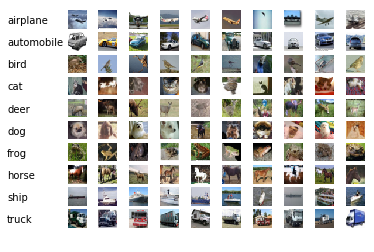

In [1]:
%matplotlib inline
from data_processing import *
# download_data()
data = load_data()
plot_data(data)

### 3. Shallow classifier (*shallow_classifier.py*)
I used HOG features and Random Forest (from Tensorflow). It achieves accuracy of 0.4357. There were 144 HOG features.

### 4. Feature extraction (*cnn_codes_extraction.py*)
Features were extracted from Inception-v3 using pool_3 layer, and then pickled.

### 5. Visualize CNN codes (*cnn_codes_extraction.py*)
Codes were embedded into two dimensions using t-SNE with initial PCA. Only 2500 codes are plotted to save time and maintain visibility. (cnn_codes.png)

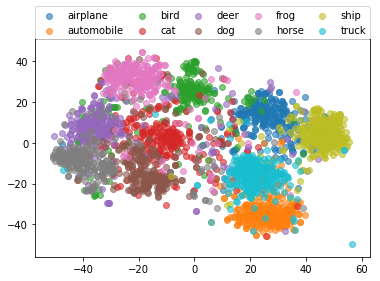

In [2]:
from cnn_codes_extraction import *
train_codes = pickle.load(open(DATA_PATH + 'train_cnn_codes', 'rb'))
train_labels = pickle.load(open(DATA_PATH + 'train_labels', 'rb'))

X, X_labels = change_dimension(train_codes, train_labels)
visualize_cnn_codes(X, X_labels)

### 6 and 7. Train SVM (*svm_classifier.py*)
I did GridSearchCV on 10000 images from training dataset. In grid search I used linear and rbf kernels, C = {1, 10, 100, 1000}, and gamma = {0.1, 0.01, 0.001, 0.0001}. The best result was given by rbf kernel with C=10 and gamma=0.001. Then, SVM with those parameters was trained on entire training set and it achieved accuracy of 0.9104 on testing set. 

### 8. Extras (*svm_classifier_pca.py*, *svm_ensemble.py*) 
However, using all 2048 features takes a lot of time (training on the entire training set, using the best parameters: 858.2 s ~ 15 min, and searching for parameters even longer). So, I tested if using PCA on that data to reduce dimensions to 144 would help. Using the same parameters (C=10, gamma=0.0001), classifier achieved accuracy of 0.8994 in just 76.1s. And, using the best parameters, according to grid search (C=10.0, gamma=0.01), classifier achived accuracy of 0.9064 in 158.8s.

Also, I used bagging method to improve the result (without PCA). Max_samples and max_features parameters were set to 0.5, the kernel was 'rbf', C = {1, 10, 100, 1000}, and gamma = {0.1, 0.01, 0.001, 0.0001}. Training and validation sets, used to find the best parameters, were created by sklearn.model_selection.train_test_split function. The best result was given by the classifier with C=100, gamma=0.001 with the accuracy of 0.9033 when training on the entire training set.